## Practical Exercises

We are going to work on a different dataset from the theory. It's a dataset oriented to housing properties on sale in Melbourne, Australia. Each row registers a sold property and each column its properties.

In [5]:
import pandas as pd

melb_housing_df = pd.read_csv("../data/melb_housing_df.csv")

# If you are using google colab use this code to load the dataframe.
# url = "https://raw.githubusercontent.com/benjaminocampo/CDL_data_visualization/main/data/melb_housing_df.csv"
# melb_housing_df = pd.read_csv(url)

In [6]:
melb_housing_df

,housing_address,housing_room_count,housing_type,housing_price,housing_selling_method,housing_seller_agency,housing_date_sold,housing_cbd_distance,housing_bedroom_count,housing_bathroom_count,...,housing_building_area,housing_year_built,housing_lattitude,housing_longitude,suburb_id,housing_closest_neighborhood_overview,housing_room_segment,housing_bathroom_segment,housing_garage_segment,housing_date_sold_datetime
0,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,2.0,1.0,...,NaN,NaN,-37.79960,144.99840,0,Neighbourhood is quiet but super close to the ...,"(1, 2]","(0, 1]","(0, 1]",2016-03
1,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,2.0,1.0,...,79.0,1900.0,-37.80790,144.99340,0,"Abbotsford is a small, leafy, inner city subur...","(1, 2]","(0, 1]","(-1, 0]",2016-04
2,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3.0,2.0,...,150.0,1900.0,-37.80930,144.99440,0,One thing I often get is people don't realize ...,"(2, 3]","(1, 2]","(-1, 0]",2017-04
3,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3.0,2.0,...,NaN,NaN,-37.79690,144.99690,0,Close to absolutley everything. Fantastic café...,"(2, 3]","(1, 2]","(0, 1]",2017-04
4,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3.0,1.0,...,142.0,2014.0,-37.80720,144.99410,0,"Abbotsford is a small, leafy, inner city subur...","(3, 4]","(0, 1]","(1, 2]",2016-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13201,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,4.0,2.0,...,NaN,1981.0,-37.90562,145.16761,248,"街区很美 幽静适宜居住 Very quite, and comfortable area w...","(3, 4]","(1, 2]","(1, 2]",2017-08
13202,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3.0,2.0,...,133.0,1995.0,-37.85927,144.87904,104,We are in a secure cul de sac ( court ) and ha...,"(2, 3]","(1, 2]","(1, 2]",2017-08
13203,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3.0,2.0,...,NaN,1997.0,-37.85274,144.88738,104,"Ideally located close to Melbourne CBD, Newpor...","(2, 3]","(1, 2]","(2, 10]",2017-08
13204,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,4.0,1.0,...,157.0,1920.0,-37.85908,144.89299,104,Places to visit in Williamstown: Williamtown ...,"(3, 4]","(0, 1]","(2, 10]",2017-08


**Exercises**:

**1)** Remove outliers of the random variable `housing_price` by filtering out
all those instances which are 2.5 standard deviations apart from the mean. That
is, given an instance $x$ and mean $\overline{x}$ and standard deviation
$\sigma$, $x$ is **not** considered **an outlier** iff:

$$|x - \overline{x}| \leq 2.5 \times \sigma $$

Apply the filter by updating the dataframe `melb_housing_df`.
Plot boxplots before and after removing outliers.


**2)** Using the filtered dataframe `melb_housing_df` of exercise 1) and the
columns `housing_seller_agency` and `housing_price`, obtain the total collected
money of the seller sales. Then, select the sellers with the 10 highest earnings
(Top 10 best sellers) and create a `barplot` using `seaborn`.

**3)** Create a `barplot` using `seaborn` that compares on the X ax the agency
of these 10 sellers and their average property price. Plot the barplot in the same order as exercise 2.

**4)** Create the same `barplot` but this time using `plotly`. Remember that a
barplot performs an aggregation that in seaborn is done automatically, but in
Plotly, you'll have to make the aggregation before with pandas. Do not consider
the error bars for this plot.

<Axes: ylabel='housing_price'>

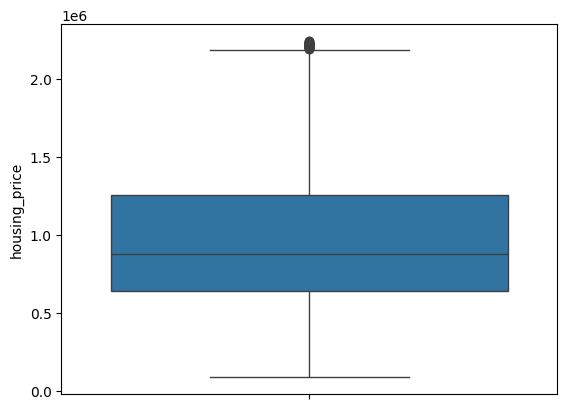

In [8]:
import seaborn
mean_price = melb_housing_df["housing_price"].mean()
std_price = melb_housing_df["housing_price"].std()

lower_limit = mean_price - 2.5 * std_price
upper_limit = mean_price + 2.5 * std_price


melb_housing_df_no_outlier = melb_housing_df[
    (melb_housing_df['housing_price'] >= lower_limit) & 
    (melb_housing_df['housing_price'] <= upper_limit)
]

seaborn.boxplot(melb_housing_df_no_outlier["housing_price"])


In [ ]:
# 2 

seller_earnings = melb_housing_df_no_outlier.groupby('housing_seller_agency')['housing_price'].sum().reset_index()

# Rename the column for clarity
seller_earnings.rename(columns={'housing_price': 'total_earnings'}, inplace=True)

# Sort the sellers by total earnings in descending order
top_sellers = seller_earnings.sort_values(by='total_earnings', ascending=False).head(10)


plt.figure(figsize=(10,5))
seaborn.barplot(x="housing_seller_agency",y="total_earnings",data=top_sellers)
plt.xticks(rotation=45)
plt.title("Total Earnings of top 10 best sellers")
